# Prepare data for training
## Third level, time range

In [37]:
import pandas as pd
from _datetime import date
import matplotlib.pyplot as plt
import seaborn as sns

In [38]:
#df = pd.read_csv('20201125_catalogueSampleSource.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
#df = pd.read_csv('20201211_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
#df = pd.read_csv('20201216_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
#df = pd.read_csv('20210111_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
# df = pd.read_csv('20210116_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])
df = pd.read_csv('dataset/20210604_catalogueSampleNormClasses.csv',usecols=['source','condition','fr0','fr1','fr2','fr3','fr4','fr5','fr6','fr7','CEsnippet','Sentence'])

df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis..."
2,MAYO,Plague,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an..."
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1.0,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...


In [39]:
df.drop_duplicates(subset=['Sentence'], keep = "first", inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 0 to 1986
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source     1983 non-null   object 
 1   condition  1983 non-null   object 
 2   fr0        1983 non-null   object 
 3   fr1        405 non-null    object 
 4   fr2        405 non-null    object 
 5   fr3        405 non-null    float64
 6   fr4        405 non-null    object 
 7   fr5        405 non-null    object 
 8   fr6        405 non-null    object 
 9   fr7        405 non-null    object 
 10  Sentence   1983 non-null   object 
 11  CEsnippet  1981 non-null   object 
dtypes: float64(1), object(11)
memory usage: 201.4+ KB


In [40]:
df = df.query("fr0 != 'NONE'")
df = df.query("fr0 != 'PERMANENT'")

In [41]:
df['fr3'] = df['fr3'].fillna(0).astype(int)
df.loc[df['fr3'].notnull(), 'fr3f'] = df['fr3'].map(str)

df.loc[df['fr6'].isnull(),'fr6f'] = ''
#df.loc[df['fr6']==0,'fr6f'] = ''
df.loc[df['fr6'].notnull(), 'fr6f'] = df['fr6'].map(str)

df.loc[df['fr3f']=='0','fr3f'] = ''
df.loc[df['fr6f']=='0','fr6f'] = ''

df['reviewedTag'] = df.fr0.fillna('') + (' ') + df.fr1.fillna('')+ (' ') + df.fr2.fillna('') + (' ') +df.fr3f+ (' ' + df.fr4).fillna('')+ (' ' + df.fr5).fillna('')+ (' ') + df.fr6f+ (' ' + df.fr7).fillna('')
df['reviewedTag'] = df['reviewedTag'].str.strip()

In [42]:
df['newTag'] = df.fr2.fillna('') + (' ') +df.fr3f+ (' ' + df.fr4).fillna('')+ (' ' + df.fr5).fillna('')+ (' ') + df.fr6f+ (' ' + df.fr7).fillna('')
df['newTag'] = df['newTag'].str.strip()
#print(df.reviewedTag[0:3])
df.head()

,source,condition,fr0,fr1,fr2,fr3,fr4,fr5,fr6,fr7,Sentence,CEsnippet,fr3f,fr6f,reviewedTag,newTag
0,MAYO,Acute kidney failure,DECLINE,FAST,FROM,1,DAY,TO,1,WEEK,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...,1,1,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
1,MAYO,Systemic mastocytosis,DECLINE,FAST,FROM,1,DAY,TO,1,WEEK,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis...",1,1,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
2,MAYO,Plague,DECLINE,FAST,FROM,1,DAY,TO,1,WEEK,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...,1,1,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
3,MAYO,Dermatographia,DECLINE,FAST,FROM,1,DAY,TO,1,WEEK,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an...",1,1,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
4,NHS,Epiglottitis,DECLINE,FAST,FROM,1,DAY,TO,1,WEEK,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...,1,1,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK


In [43]:
df.info()
df.newTag.value_counts(dropna=False)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 405 entries, 0 to 408
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   source       405 non-null    object
 1   condition    405 non-null    object
 2   fr0          405 non-null    object
 3   fr1          405 non-null    object
 4   fr2          405 non-null    object
 5   fr3          405 non-null    int64 
 6   fr4          405 non-null    object
 7   fr5          405 non-null    object
 8   fr6          405 non-null    object
 9   fr7          405 non-null    object
 10  Sentence     405 non-null    object
 11  CEsnippet    403 non-null    object
 12  fr3f         405 non-null    object
 13  fr6f         405 non-null    object
 14  reviewedTag  405 non-null    object
 15  newTag       405 non-null    object
dtypes: int64(1), object(15)
memory usage: 53.8+ KB


FROM 8 DAY TO 2 MONTH       108
FROM 1 YEAR TO MORE YEAR     92
FROM 5 MINUTE TO 1 DAY       74
FROM 2 MONTH TO 6 MONTH      54
FROM 1 DAY TO 1 WEEK         43
FROM 6 MONTH TO 1 YEAR       34
Name: newTag, dtype: int64

In [44]:
col = ['source','condition','CEsnippet','Sentence','reviewedTag','newTag']
df = df[col]

df.columns
df.head()

,source,condition,CEsnippet,Sentence,reviewedTag,newTag
0,MAYO,Acute kidney failure,Acute kidney failure — also called acute renal...,Acute kidney failure — also called acute renal...,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
1,MAYO,Systemic mastocytosis,"Another type, aggressive systemic mastocytosis...","Another type, aggressive systemic mastocytosis...",DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
2,MAYO,Plague,Pneumonic plague progresses rapidly and may ca...,Pneumonic plague progresses rapidly and may ca...,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
3,MAYO,Dermatographia,"Rarely, dermatographia develops more slowly an...","Rarely, dermatographia develops more slowly an...",DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK
4,NHS,Epiglottitis,The symptoms of epiglottitis usually develop q...,The symptoms of epiglottitis usually develop q...,DECLINE FAST FROM 1 DAY TO 1 WEEK,FROM 1 DAY TO 1 WEEK


In [45]:
df.to_csv('dataset/'+str(date.today())+'_datasetThirdLevel.csv', index = False)
#df.to_csv('2021-01-11_datasetThirdLevel.csv', index = False)

Text(0.5, 1.0, 'Number of sentences per class')

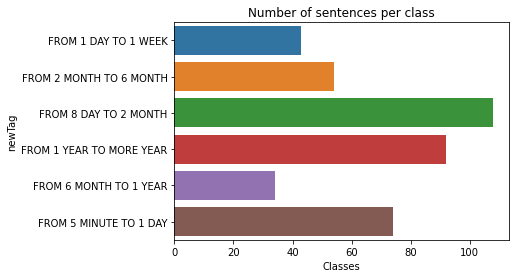

In [46]:
sns.countplot(y=df.newTag, data=df)
plt.xlabel('Classes')
plt.title('Number of sentences per class')

In [47]:
p = df['newTag'].value_counts()#.to_dict()
q = df['newTag'].value_counts(normalize=True)
r = pd.concat([p.rename('Count'),q.rename('Proportion')],axis=1)
print(r)

                          Count  Proportion
FROM 8 DAY TO 2 MONTH       108    0.266667
FROM 1 YEAR TO MORE YEAR     92    0.227160
FROM 5 MINUTE TO 1 DAY       74    0.182716
FROM 2 MONTH TO 6 MONTH      54    0.133333
FROM 1 DAY TO 1 WEEK         43    0.106173
FROM 6 MONTH TO 1 YEAR       34    0.083951
